# analyse images

## WHU_512_small

In [19]:
import pandas as pd 
whu3k=pd.read_csv("image_scores_3000.csv")
whu3k.head()

,img,psnr,ssim,lpips,enl,epi
0,../DataStore/WHU_512_small/NH49E001013.tif_0_1...,20.035067,0.490518,0.123668,1.295342,0.623841
1,../DataStore/WHU_512_small/NH49E001013.tif_0_1...,19.924184,0.492233,0.119137,1.324979,0.617451
2,../DataStore/WHU_512_small/NH49E001013.tif_0_1...,20.623123,0.502518,0.112738,1.501790,0.646181
3,../DataStore/WHU_512_small/NH49E001013.tif_0_6...,22.796971,0.556175,0.091882,0.993441,0.674226
4,../DataStore/WHU_512_small/NH49E001013.tif_10_...,19.680346,0.560390,0.116778,1.282965,0.663405


In [22]:
import os
whu3k['img']=whu3k['img'].apply(os.path.basename)
whu3k.head()

,img,psnr,ssim,lpips,enl,epi
0,NH49E001013.tif_0_12.png,20.035067,0.490518,0.123668,1.295342,0.623841
1,NH49E001013.tif_0_13.png,19.924184,0.492233,0.119137,1.324979,0.617451
2,NH49E001013.tif_0_14.png,20.623123,0.502518,0.112738,1.501790,0.646181
3,NH49E001013.tif_0_6.png,22.796971,0.556175,0.091882,0.993441,0.674226
4,NH49E001013.tif_10_15.png,19.680346,0.560390,0.116778,1.282965,0.663405


In [32]:
whu3k.columns

Index(['img', 'psnr', 'ssim', 'lpips', 'enl', 'epi'], dtype='object')

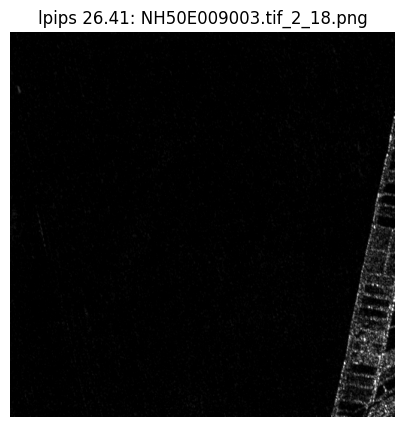

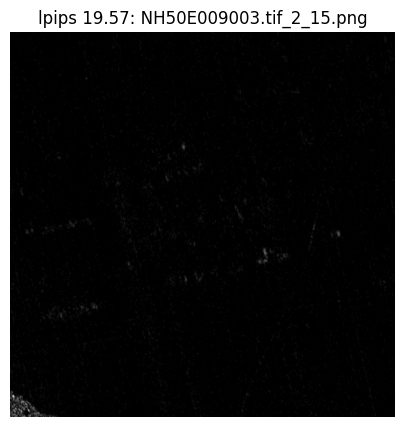

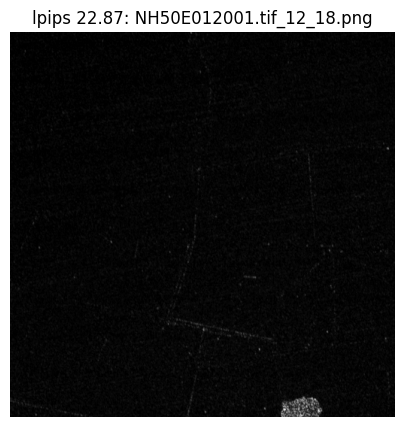

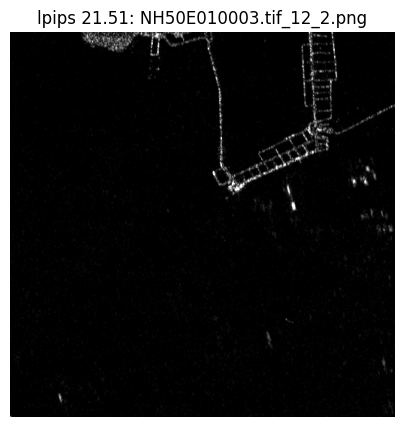

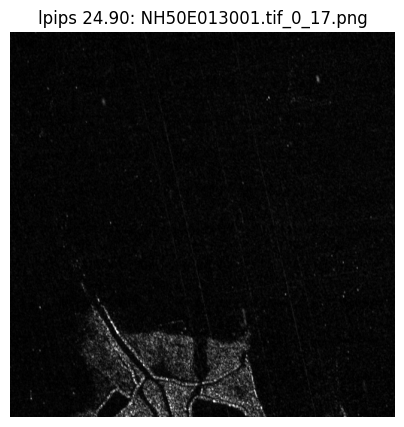

In [35]:
import matplotlib.pyplot as plt 
import cv2

worst_5=whu3k.sort_values(by='lpips',ascending=True).head(5)

for idx, row in worst_5.iterrows():
    img_path = os.path.join("../DataStore/WHU_512_small", row['img'])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    plt.figure(figsize=(5,5))
    plt.imshow(img, cmap='gray')
    plt.title(f"lpips {row['psnr']:.2f}: {row['img']}")
    plt.axis('off')
    plt.show()

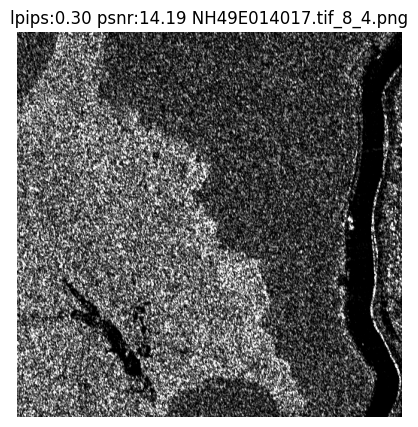

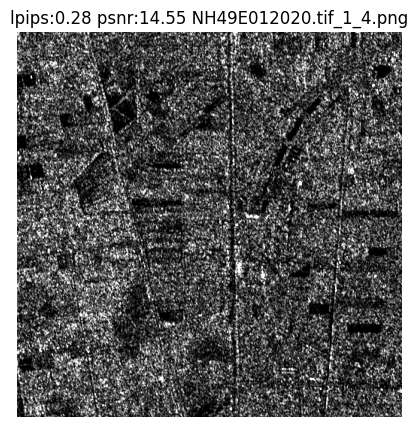

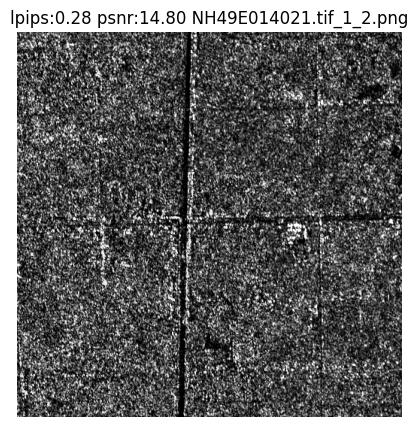

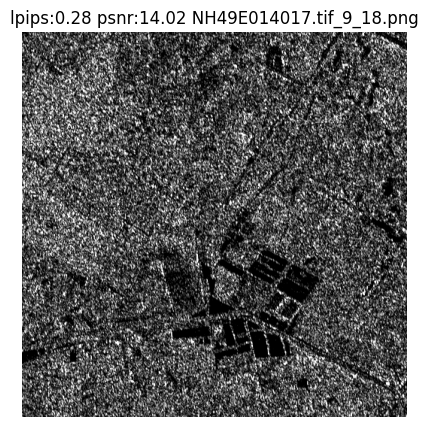

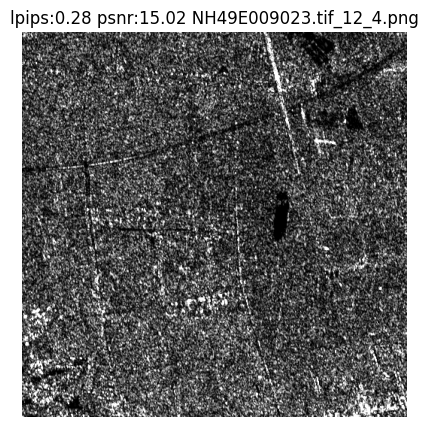

In [38]:

best_5=whu3k.sort_values(by='lpips',ascending=False).head(5)

for idx, row in best_5.iterrows():
    img_path = os.path.join("../DataStore/WHU_512_small", row['img'])
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    plt.figure(figsize=(5,5))
    plt.imshow(img, cmap='gray')
    plt.title(f"lpips:{row['lpips']:.2f} psnr:{row['psnr']:.2f} {row['img']}")
    plt.axis('off')
    plt.show()

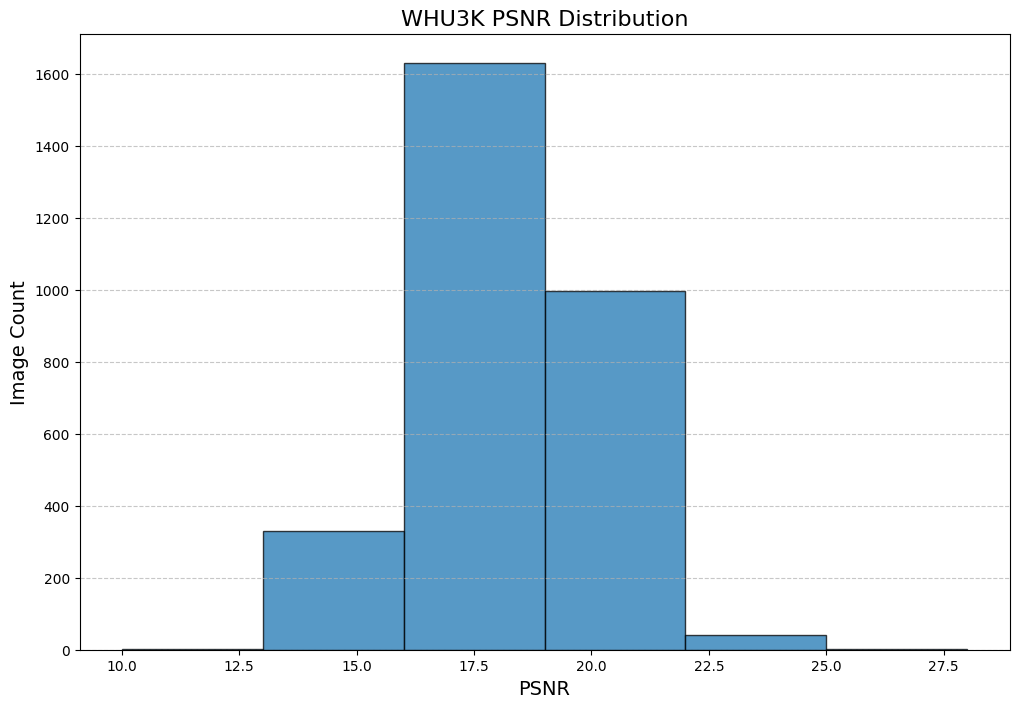

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# 假设 whu3k['psnr'] 是你的 PSNR 列
psnr_values = whu3k['psnr']

# 计算区间
psnr_min = min(psnr_values)
psnr_max = max(psnr_values)

# 自定义分箱（bins）
psnr_bins = [10, 13, 16, 19, 22, 25, 28]

# 绘制直方图
plt.figure(figsize=(12, 8))
plt.hist(psnr_values, bins=psnr_bins, edgecolor='black', alpha=0.75)

# 添加标签和标题
plt.xlabel('PSNR', fontsize=14)
plt.ylabel('Image Count', fontsize=14)
plt.title('WHU3K PSNR Distribution', fontsize=16)

# 添加网格
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 显示
plt.show()


In [41]:
max(whu3k['enl'])

181.7770909879884

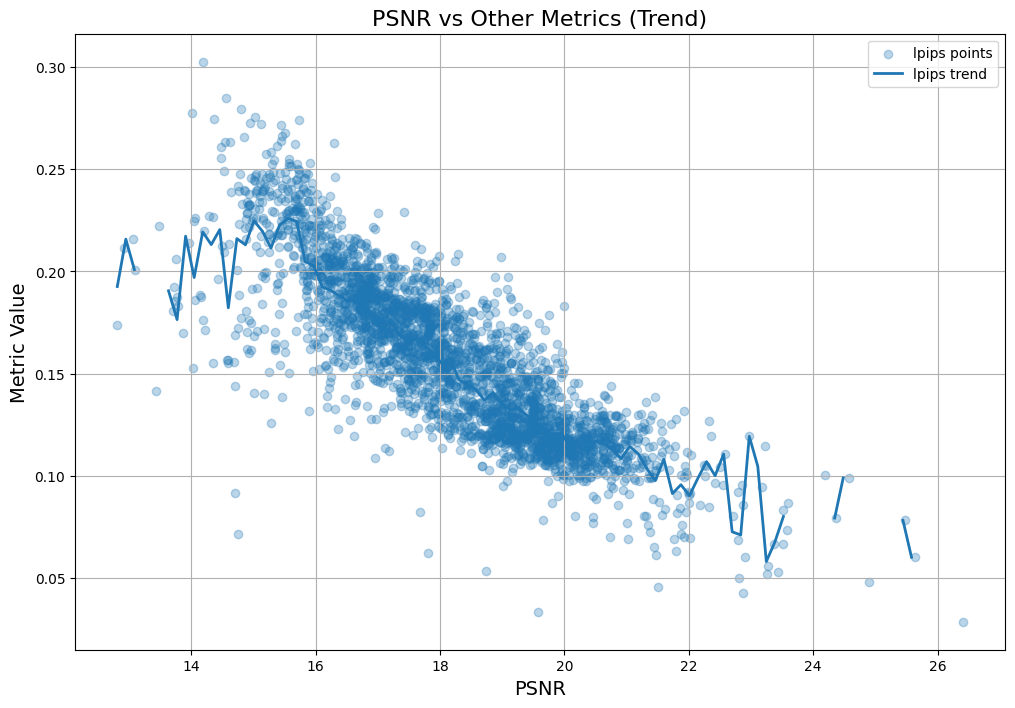

In [46]:
import numpy as np

plt.figure(figsize=(12, 8))
whu3k['enl_clipped'] = whu3k['enl'].clip(upper=10)  # 上限为10

metrics = ['lpips']
psnr = whu3k['psnr']

for metric in metrics:
    plt.scatter(psnr, whu3k[metric], alpha=0.3, label=metric + " points")
    
    # 分段取均值作为趋势曲线（简单平滑）
    psnr_bins = np.linspace(psnr.min(), psnr.max(), 100)
    digitized = np.digitize(psnr, psnr_bins)
    bin_means = [whu3k[metric][digitized == i].mean() for i in range(1, len(psnr_bins))]

    plt.plot(psnr_bins[:-1], bin_means, label=metric + " trend", linewidth=2)

plt.xlabel('PSNR', fontsize=14)
plt.ylabel('Metric Value', fontsize=14)
plt.title('PSNR vs Other Metrics (Trend)', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()


In [1]:
import os 
import shutil 
import numpy as np 

ori_path="/home/flyingbucket/DataStore/WHU/WHU_256"
test_name=f"{os.path.basename(ori_path)}_test"

target_path=os.path.join(os.path.dirname(ori_path),test_name)
os.makedirs(target_path)
imgs=os.listdir(ori_path)

n=len(imgs)
select=int(n*0.2)

index=np.random.choice(n-1,select,replace=False)
for i in index:
    img=imgs[i]
    src=os.path.join(ori_path,img)
    target=os.path.join(target_path,img)
    shutil.copy(src,target)
print(f"Total {n} images found in{ori_path}\nCopied {select} images from {ori_path} to {target_path}")

Total 104000 images found in/home/flyingbucket/DataStore/WHU/WHU_256
Copied 20800 images from /home/flyingbucket/DataStore/WHU/WHU_256 to /home/flyingbucket/DataStore/WHU/WHU_256_test


In [3]:
len(os.listdir("/home/flyingbucket/DataStore/iceye/train_256_test"))

265

In [5]:
import os
from pathlib import Path
from collections import Counter
import cv2

# 你给的多个路径列表
gt_paths = [
    # "/home/flyingbucket/DataStore/DDHRNet_DATA/korea/cloud/GF3",
    # "/home/flyingbucket/DataStore/DDHRNet_DATA/shandong/GF3",
    # "/home/flyingbucket/DataStore/NKU_coco/train_256",
    # "/home/flyingbucket/DataStore/iceye/train_256",
    "/home/flyingbucket/DataStore/HR-SARBuD/images_256"
]

# 支持的图片后缀
image_extensions = {'.png', '.jpg', '.jpeg', '.bmp', '.tif', '.tiff'}

# 用来存储所有图片的分辨率计数
resolution_counter = Counter()

total_images = 0
failed_images = 0

for folder in gt_paths:
    folder_path = Path(folder)
    if not folder_path.exists():
        print(f"Warning: folder not found: {folder}")
        continue

    # 递归遍历所有图片
    resolution_counter_folder=Counter()
    for img_path in folder_path.rglob("*"):
        if img_path.suffix.lower() in image_extensions:
            total_images += 1
            # 读取图片获取分辨率
            img = cv2.imread(str(img_path))
            if img is None:
                print(f"Failed to read image: {img_path}")
                failed_images += 1
                continue
            h, w = img.shape[:2]
            resolution_counter[(w, h)] += 1  # 统计宽×高格式
            resolution_counter_folder[(w,h)]+=1
    print(f"In folder folder {folder_path}")
    for res,count in resolution_counter_folder.most_common():
        print(f"{res[0]} x {res[1]} : {count}")
        
            

print(f"Total images found: {total_images}")
print(f"Failed to read: {failed_images}")

print("\nTop 20 most common resolutions (Width x Height) and counts:")
for res, count in resolution_counter.most_common(20):
    print(f"{res[0]} x {res[1]} : {count}")


In folder folder /home/flyingbucket/DataStore/HR-SARBuD/images_256
256 x 256 : 89224
Total images found: 89224
Failed to read: 0

Top 20 most common resolutions (Width x Height) and counts:
256 x 256 : 89224
